# **Resolvendo um circuito elétrico com PSO (biblioteca pyswarms)**

https://pyswarms.readthedocs.io/en/latest/examples/usecases/electric_circuit_problem.html

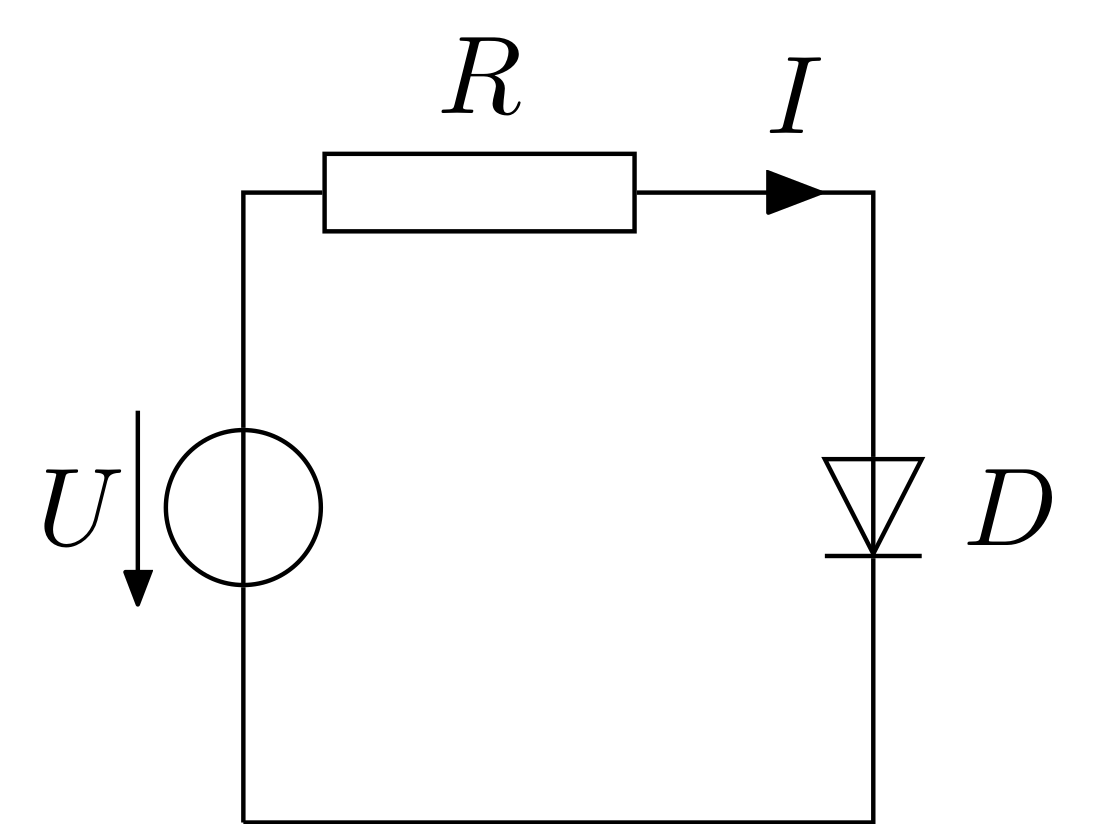

In [1]:
!pip install pyswarms

In [2]:
#Bibliotecas

import sys
import numpy as np
import matplotlib.pyplot as plt
import pyswarms as ps

In [3]:
#Função custo

def cost_function(I):

    #Parametros fixos
    U = 10
    R = 100
    I_s = 9.4e-12
    v_t = 25.85e-3

    c = abs(U - v_t * np.log(abs(I[:, 0] / I_s)) - R * I[:, 0])

    return c

In [4]:
#Hiperparametros
options = {'c1': 0.5, 'c2': 0.3, 'w':0.3}

#PSO
optimizer = ps.single.GlobalBestPSO(n_particles=10, dimensions=1, options=options)

#Otimização
cost, pos = optimizer.optimize(cost_function, iters=30)

2025-01-27 14:12:02,509 - pyswarms.single.global_best - INFO - Optimize for 30 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.3}
pyswarms.single.global_best: 100%|██████████|30/30, best_cost=1.01e-5
2025-01-27 14:12:02,570 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 1.012417889789674e-05, best pos: [0.09404779]


In [5]:
pos

array([0.09404779])

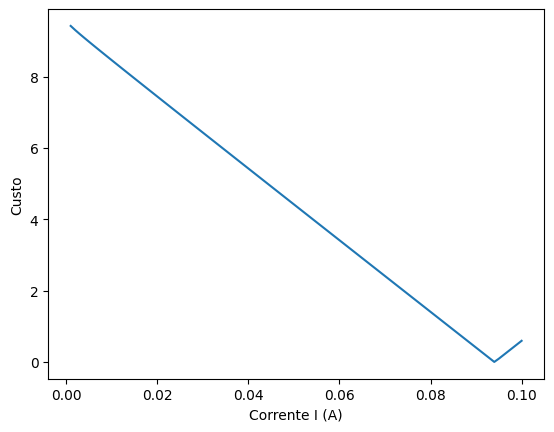

In [6]:
#Solução

x = np.linspace(0.001, 0.1, 100).reshape(100, 1)
y = cost_function(x)

plt.plot(x, y)
plt.xlabel('Corrente I (A)')
plt.ylabel('Custo');

In [7]:
#Solver não-linear
from scipy.optimize import fsolve

c = lambda I: abs(10 - 25.85e-3 * np.log(abs(I / 9.4e-12)) - 100 * I)

initial_guess = 0.09

current_I = fsolve(func=c, x0=initial_guess)

print(current_I[0])

0.09404768643017938


In [8]:
#Diferença
current_I[0] - pos

array([-1.00964278e-07])